<a href="https://colab.research.google.com/github/shabanakausar/shabanakausar/blob/main/Classify_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
#----------------------Classifying newswires: a multiclass classification example---------------------

In [141]:
#-------------------------------Loading the Reuters dataset-------------------

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [142]:
len(train_data)

8982

In [143]:
len(test_data)

2246

In [144]:
train_data.shape

(8982,)

In [145]:
test_data.shape

(2246,)

In [146]:
#-----------------------------------------Decoding newswires back to text------------------------------------
#------------------Note that the indices are offset by 3 because 0, 1, and 2 are reserved--------------------
#------------------------indices for “padding,” “start of sequence,” and “unknown.”--------------------------
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [147]:
#-----------------The label associated with an example is an integer between 0 and 45—a topic index:----------
train_labels[10]

3

In [148]:
#----------------------------------Prepare the Data-----------------------------------
#----------------------------------Encoding the data----------------------------------
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [149]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [150]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


In [151]:
#----------------------------------Vectorized training labels---------------------------------------
#------------------------------------Vectorized test labels-----------------------------------------
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#-------------------built-in way to do this in Keras, which you’ve already seen in action in the MNIST example:
#from keras.utils.np_utils import to_categorical
#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)

In [152]:
#--------------------------------------------Model definition-----------------------------------------
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [153]:
#---------------------------------Compile the model 
model.compile(optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

In [154]:
#-------------------------------------Setting aside a validation set--------------------------------------
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [155]:
#-------------------------------------------Training the model--------------------------------------------------    
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 62ms/step - loss: 2.6261 - accuracy: 0.5377 - val_loss: 1.7218 - val_accuracy: 0.6580
Epoch 2/20
16/16 [==============================] - 1s 52ms/step - loss: 1.4127 - accuracy: 0.7191 - val_loss: 1.2819 - val_accuracy: 0.7280
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 1.0397 - accuracy: 0.7789 - val_loss: 1.1100 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 1s 52ms/step - loss: 0.8167 - accuracy: 0.8285 - val_loss: 1.0165 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 1s 54ms/step - loss: 0.6562 - accuracy: 0.8613 - val_loss: 0.9704 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5230 - accuracy: 0.8895 - val_loss: 0.9360 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.4240 - accuracy: 0.9124 - val_loss: 0.8985 - val_accuracy: 0.8160
Epoch 8/20
16

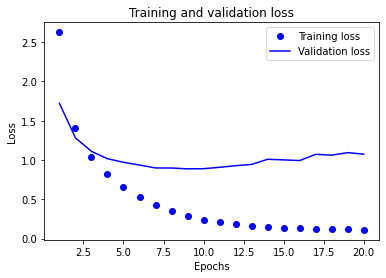

In [156]:
#---------------------------------Plotting the training and validation loss-----------------------------------

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

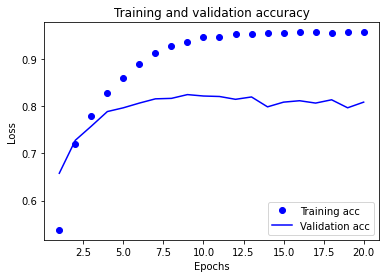

In [157]:
#--------------------------------------Plotting the training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [158]:
#---------------------------------Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 61ms/step - loss: 2.5564 - accuracy: 0.4945 - val_loss: 1.7028 - val_accuracy: 0.6180
Epoch 2/9
16/16 [==============================] - 1s 52ms/step - loss: 1.3937 - accuracy: 0.6992 - val_loss: 1.2986 - val_accuracy: 0.7010
Epoch 3/9
16/16 [==============================] - 1s 52ms/step - loss: 1.0448 - accuracy: 0.7717 - val_loss: 1.1382 - val_accuracy: 0.7410
Epoch 4/9
16/16 [==============================] - 1s 52ms/step - loss: 0.8190 - accuracy: 0.8247 - val_loss: 1.0335 - val_accuracy: 0.7710
Epoch 5/9
16/16 [==============================] - 1s 52ms/step - loss: 0.6494 - accuracy: 0.8566 - val_loss: 0.9734 - val_accuracy: 0.7860
Epoch 6/9
16/16 [==============================] - 1s 52ms/step - loss: 0.5194 - accuracy: 0.8893 - val_loss: 0.9105 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 1s 52ms/step - loss: 0.4162 - accuracy: 0.9131 - val_loss: 0.9091 - val_accuracy: 0.8040
Epoch 8/9
16/16 [===

In [159]:
results

[0.9942623972892761, 0.7853962779045105]

In [160]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19412288512911843

In [161]:
#---------------------------------------Generating predictions for new data------------------------

predictions = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 3ms/step


(46,)

In [162]:
#------------------------------------The coefficients in this vector sum to 1:
np.sum(predictions[0])

1.0000001

In [163]:
#----------------------The largest entry is the predicted class—the class with the highest probability:
np.argmax(predictions[0])

3

In [164]:
#-------------------------------A different way to handle the labels and the loss
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [165]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])